# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Opening a new Crepe shop in Doha , Qatar.

## Introduction: Business Problem

In this project we aim to explore the idea of opening a new Crepes&Waffles shop in Doha,Qatar .Followed by recommendation of  the best location for it . Specifically, this report will be targeted to Crepeaholic chain that already has presence in Amman,Jordan and Abu Dhabi,UAE .I am a fan of this place and I personally know the owner . I suggested him the idea of the project and its expected outcomes . He is excited to extend the view and have some insights & observations.

First , we would like to research the the demographics and financials aspects of Qatar and Doha in particular .
pursued by analysis of market growth (Resturants/cafes count during time) .if possible ,with intention to investigate the question of how many resturants/cafes were opened and closed in a short period of time .


Since there are lots of restaurants&cafes in Doha, we will try to detect locations that are not already crowded with restaurants/cafes but crowded with people. and as per the owner ; the focus shall be on family oriented areas and with a preference of a community aged between 16-35 years old .
We are also particularly interested in areas with no or few desserts&Cafe shops in vicinity. We would also prefer locations as close to city center as possible, considering all other conditions are met .


## Data

Based on definition of our business case, factors that will influence our decission are:

* Number of current restaurants/cafes in Doha and each Neighborhood.
* A time series that shows the growth of resturants/cafes In Doha and specifically the targeted kind of shops.
* Demographics of each neighborhood .
* investigate the number of resturants and cafes that were opened and closed in the period of  2017-2021.
* Distance of neighborhood from city center.
* Top 5 venue categories in each neighboorhood and its corrosponded average customer review rates 



Data Needed  :


* List of Doha's Neighborhoods.
* Demographics tables about Doha .
* Foursquare API location data.
* If available , customer reviews and rates for each venue in Foursquare  data. 
* If available , foot traffic and check-ins details . 
* Financial details of Qatar and Doha. 






import the required libraries for now

In [1]:
import pandas as pd 
import numpy as np


Scraping the table data "Neighborhoods in Doha,Qatar" from the Wikipedia page and determine the size of it .

In [2]:
df=pd.read_html('https://en.wikipedia.org/wiki/Zones_of_Qatar#Ad_Dawhah_Municipality')[2]
df.head(10)

Zone no.                                      Districts  Area (km²)  \
0        1                                      Al Jasrah         0.4   
1        2                                       Al Bidda         NaN   
2        3             Fereej Mohamed Bin Jasim Mushayrib         NaN   
3        4                                      Mushayrib         0.3   
4        5  Al Najada Barahat Al Jufairi Fereej Al Asmakh         0.2   
5        6                                  Old Al Ghanim         0.3   
6        7                                        Al Souq         0.3   
7       10                                   Wadi Al Sail         NaN   
8       11                                       Rumeilah         NaN   
9       12                                       Al Bidda         NaN   

  Population (2015)  
0     240 (2010)[6]  
1      35 (2010)[6]  
2   4,886 (2010)[6]  
3              9791  
4              2086  
5              1124  
6               297  
7       8 (2010)[6]  
8      63 (2010)[6]  
9   1,067 (2010)[6]

After Examining the available raw data , these points were noticed : 
1. The data consists of columns : Zone #, District or neighborhood, Area ,and corresponded Population.
2. Data extracted from Wikipedia but the reference is a report from Ministry of development planning and statistics in Qatar.
3. Data originally has  56 neighborhoods/districts. 
4. Some population values are based on old report in 2010 .by observing these values , we can see they represent a very minimal out of total .Thus , we may remove these rows for the sake of our study .
5. Last row represents the total for all Doha and we may drop it .
6. some districts columns have more than one neighborhoods.





##### Data Manipulation to make the required changes in the data 

In [3]:
# Rename columns 
df.rename(columns={'Districts':'Neighborhood'},inplace=True)
df.rename(columns={'Population (2015)':'Population'},inplace=True)


In [4]:
# dropping Zone no. column
df.drop(['Zone no.'],axis=1,inplace=True)
df

Neighborhood  Area (km²)  \
0                                          Al Jasrah         0.4   
1                                           Al Bidda         NaN   
2                 Fereej Mohamed Bin Jasim Mushayrib         NaN   
3                                          Mushayrib         0.3   
4      Al Najada Barahat Al Jufairi Fereej Al Asmakh         0.2   
5                                      Old Al Ghanim         0.3   
6                                            Al Souq         0.3   
7                                       Wadi Al Sail         NaN   
8                                           Rumeilah         NaN   
9                                           Al Bidda         NaN   
10                                         Mushayrib         0.7   
11                                 Fereej Abdel Aziz         0.5   
12                              Ad Dawhah al Jadidah         0.5   
13                                     Old Al Ghanim         0.4   
14                             Al Rufaa Old Al Hitmi         0.4   
15                              As Salatah Al Mirqab         0.6   
16                                         Doha Port         NaN   
17                                      Wadi Al Sail         1.3   
18                                          Rumeilah         0.8   
19                                Fereej Bin Mahmoud         0.6   
20                                Fereej Bin Mahmoud         1.8   
21                                   Rawdat Al Khail         1.7   
22                     Fereej Bin Durham Al Mansoura         1.5   
23                                             Najma         1.1   
24                                    Umm Ghuwailina         1.4   
25                        Al Khulaifat Ras Abu Aboud         0.9   
26                                            Duhail         6.8   
27                                        Umm Lekhba         3.1   
28               Madinat Khalifa North Dahl Al Hamam         2.4   
29                                       Al Markhiya         2.7   
30                             Madinat Khalifa South         2.6   
31                                     Fereej Kulaib         1.1   
32                                        Al Messila         2.1   
33  Fereej Bin Omran New Al Hitmi Hamad Medical City         2.5   
34                                           Al Sadd         3.5   
35              Al Sadd New Al Mirqab Fereej Al Nasr         2.7   
36                                       New Salatah         3.5   
37                                            Nuaija         1.2   
38                                          Al Hilal         1.8   
39                                            Nuaija         4.8   
40                                            Nuaija         3.2   
41                                       Old Airport         4.7   
42                                        Al Thumama         3.7   
43                                        Al Thumama         3.3   
44                        Doha International Airport        11.6   
45                        Doha International Airport        36.9   
46                                           Zone 50         7.6   
47                                   Industrial Area        32.1   
48                                           Zone 58         0.8   
49                                Al Dafna Al Qassar         4.0   
50                                            Onaiza         2.0   
51                                         Lejbailat         1.4   
52                                            Onaiza         2.1   
53                       Onaiza Leqtaifiya Al Qassar        26.1   
54                                  Hazm Al Markhiya         4.2   
55                   Jelaiah Al Tarfa Jeryan Nejaima         9.7   
56                                      Municipality       234.0   

         Population  
0     240 (2010)[6]  
1      35 (2010)[6]  
2   4,886 (2010)[6]  
3      

In [5]:
# dropping the total row 
df.drop([56],axis=0,inplace=True)


In [6]:
# dropping 2010 data 
df=df[df['Population'].str.contains("2010")==False]


In [7]:
df.reset_index(inplace=True,drop=True)


In [8]:
df.dtypes

Neighborhood     object
Area (km²)      float64
Population       object
dtype: object

Changing population data type to Integer

In [9]:
df['Population']= df['Population'].astype(int)

<ipython-input-9-e02ec9385d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population']= df['Population'].astype(int)


it was noticed that there are duplicates in the Neighborhood column but it has different population and areas . 
We will assume that each row of them is a part of total , therefore we will group them based on Neighborhoods .


In [10]:
df=df.groupby('Neighborhood').sum()

In [11]:
df.reset_index(inplace=True)

as we have amended the data as per the required form , that study will be done on  41 distinct Neighborhoods in Doha,Qatar

In [12]:
df

Neighborhood  Area (km²)  Population
0                               Ad Dawhah al Jadidah         0.5       15920
1                                 Al Dafna Al Qassar         4.0        4022
2                                           Al Hilal         1.8       11671
3                         Al Khulaifat Ras Abu Aboud         0.9        1731
4                                        Al Markhiya         2.7        6242
5                                         Al Messila         2.1        6803
6      Al Najada Barahat Al Jufairi Fereej Al Asmakh         0.2        2086
7                              Al Rufaa Old Al Hitmi         0.4        6026
8                                            Al Sadd         3.5       17820
9               Al Sadd New Al Mirqab Fereej Al Nasr         2.7       23853
10                                           Al Souq         0.3         297
11                                        Al Thumama         7.0       21367
12                              As Salatah Al Mirqab         0.6         692
13                        Doha International Airport        48.5        2295
14                                            Duhail         6.8        7705
15                                 Fereej Abdel Aziz         0.5       15706
16                     Fereej Bin Durham Al Mansoura         1.5       37082
17                                Fereej Bin Mahmoud         2.4       28327
18  Fereej Bin Omran New Al Hitmi Hamad Medical City         2.5       26121
19                                     Fereej Kulaib         1.1        6507
20                                  Hazm Al Markhiya         4.2        8967
21                                   Industrial Area        32.1      364710
22                   Jelaiah Al Tarfa Jeryan Nejaima         9.7        5521
23                                         Lejbailat         1.4        4151
24               Madinat Khalifa North Dahl Al Hamam         2.4       12364
25                             Madinat Khalifa South         2.6       38247
26                                         Mushayrib         1.0       28069
27                                             Najma         1.1       28228
28                                       New Salatah         3.5       16086
29                                            Nuaija         9.2       33379
30                                       Old Airport         4.7       48525
31                                     Old Al Ghanim         0.7       17458
32                                            Onaiza         4.1       15437
33                       Onaiza Leqtaifiya Al Qassar        26.1       22024
34                                   Rawdat Al Khail         1.7       18200
35                                          Rumeilah         0.8        1590
36                                    Umm Ghuwailina         1.4       33262
37                                        Umm Lekhba         3.1       11897
38                                      Wadi Al Sail         1.3         240
39                                           Zone 50         7.6        1137
40                                           Zone 58         0.8        4692

Adding new columns for Population density, Longitude and latitude

In [13]:
df['Population Density']=None
df['Latitude']=None
df['Longitude']=None
df['Population Density']=df.Population/df['Area (km²)']
df['Population Density']=df['Population Density'].astype(int)

df_sorted= df.sort_values(by='Population Density',ascending=False)

Visualization of the population density per Neighborhood in Descending order.

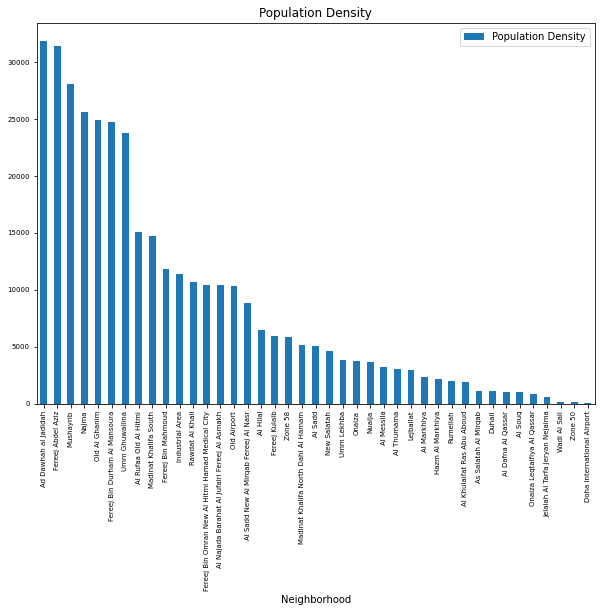

In [14]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


df_sorted.plot.bar(x='Neighborhood', y="Population Density", rot=90, title="Population Density", figsize=(10,7), fontsize=(7
                                                                                                           ))
plt.show()

##### Installing and importing the required libraries 

In [15]:
!pip install geopy
!pip install geocoder
!pip install folium

In [16]:
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm

from sklearn.cluster import KMeans
import folium

import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score
import requests

%matplotlib notebook

print('All libraries imported.')

All libraries imported.


Using Geocoder , we will bring the latitude and longitude for each of the neighborhoods


In [17]:
for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Doha, Qatar'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude'] = latitude
    df.loc[i, 'Longitude'] = longitude

In [18]:
df.reset_index(drop="yes")
df

Neighborhood  Area (km²)  Population  \
0                               Ad Dawhah al Jadidah         0.5       15920   
1                                 Al Dafna Al Qassar         4.0        4022   
2                                           Al Hilal         1.8       11671   
3                         Al Khulaifat Ras Abu Aboud         0.9        1731   
4                                        Al Markhiya         2.7        6242   
5                                         Al Messila         2.1        6803   
6      Al Najada Barahat Al Jufairi Fereej Al Asmakh         0.2        2086   
7                              Al Rufaa Old Al Hitmi         0.4        6026   
8                                            Al Sadd         3.5       17820   
9               Al Sadd New Al Mirqab Fereej Al Nasr         2.7       23853   
10                                           Al Souq         0.3         297   
11                                        Al Thumama         7.0       21367   
12                              As Salatah Al Mirqab         0.6         692   
13                        Doha International Airport        48.5        2295   
14                                            Duhail         6.8        7705   
15                                 Fereej Abdel Aziz         0.5       15706   
16                     Fereej Bin Durham Al Mansoura         1.5       37082   
17                                Fereej Bin Mahmoud         2.4       28327   
18  Fereej Bin Omran New Al Hitmi Hamad Medical City         2.5       26121   
19                                     Fereej Kulaib         1.1        6507   
20                                  Hazm Al Markhiya         4.2        8967   
21                                   Industrial Area        32.1      364710   
22                   Jelaiah Al Tarfa Jeryan Nejaima         9.7        5521   
23                                         Lejbailat         1.4        4151   
24               Madinat Khalifa North Dahl Al Hamam         2.4       12364   
25                             Madinat Khalifa South         2.6       38247   
26                                         Mushayrib         1.0       28069   
27                                             Najma         1.1       28228   
28                                       New Salatah         3.5       16086   
29                                            Nuaija         9.2       33379   
30                                       Old Airport         4.7       48525   
31                                     Old Al Ghanim         0.7       17458   
32                                            Onaiza         4.1       15437   
33                       Onaiza Leqtaifiya Al Qassar        26.1       22024   
34                                   Rawdat Al Khail         1.7       18200   
35                                          Rumeilah         0.8        1590   
36                                    Umm Ghuwailina         1.4       33262   
37                                        Umm Lekhba         3.1       11897   
38                                      Wadi Al Sail         1.3         240   
39                                           Zone 50         7.6        1137   
40                                           Zone 58         0.8        4692   

    Population Density Latitude Longitude  
0                31840  25.2758   51.5336  
1                 1005  25.3122   51.5194  
2                 6483  25.2593    51.542  
3                 1923  25.2843   51.5545  
4                 2311  25.3242   51.4891  
5                 3239  25.3034   51.4881  
6                10430  25.2848   51.5336  
7                15065   25.284   51.5478  
8                 5091  25.2816   51.5008  
9                 8834  25.2694   51.4962  
10                 990  25.2889   51.5373  
11                3052  25.2288   51.5556  
12                1153  25.2895    51.542  
13                  47  25.2572   51.5899  
14                1

Visualization the neighborhoods in the map .

In [19]:
Map_Doha = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Doha)  
    
Map_Doha

Identify the FourSquare credentials

In [20]:
# Personalized FOURSQUARE Credentials here
CLIENT_ID = 'ASW3CV1KARXMO54QIDQE3TYMFWMSWD4N4HWZAURXYDBGWB2C'
CLIENT_SECRET = 'AA1SH3ELZ1X0S40ZNSKZYFEH2ZRCMHMXYVQ5JLX1XFR4UA5V'
VERSION = '20210530'

Create a function to process all neighborhoods to get their nearby venues.

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT = 50
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
venues_2021 = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Ad Dawhah al Jadidah
Al Dafna Al Qassar
Al Hilal
Al Khulaifat Ras Abu Aboud
Al Markhiya
Al Messila
Al Najada Barahat Al Jufairi Fereej Al Asmakh
Al Rufaa Old Al Hitmi
Al Sadd
Al Sadd New Al Mirqab Fereej Al Nasr
Al Souq
Al Thumama
As Salatah Al Mirqab
Doha International Airport
Duhail
Fereej Abdel Aziz
Fereej Bin Durham Al Mansoura
Fereej Bin Mahmoud
Fereej Bin Omran New Al Hitmi Hamad Medical City
Fereej Kulaib
Hazm Al Markhiya
Industrial Area
Jelaiah Al Tarfa Jeryan Nejaima
Lejbailat
Madinat Khalifa North Dahl Al Hamam
Madinat Khalifa South
Mushayrib
Najma
New Salatah
Nuaija
Old Airport
Old Al Ghanim
Onaiza
Onaiza Leqtaifiya Al Qassar
Rawdat Al Khail
Rumeilah
Umm Ghuwailina
Umm Lekhba
Wadi Al Sail
Zone 50
Zone 58


Let's view the venues list extracted 

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
venues_2021.head(5)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Ad Dawhah al Jadidah               25.27583                51.53361   
1  Ad Dawhah al Jadidah               25.27583                51.53361   
2  Ad Dawhah al Jadidah               25.27583                51.53361   
3  Ad Dawhah al Jadidah               25.27583                51.53361   
4  Ad Dawhah al Jadidah               25.27583                51.53361   

                      Venue  Venue Latitude  Venue Longitude  \
0             sealine beach       25.273369        51.530212   
1  Mashweyat Lamazani Kebab       25.279934        51.536991   
2        Meesh Me-Time Cafe       25.273987        51.541470   
3                Kebab King       25.275301        51.539706   
4                  City Gym       25.275131        51.537954   

      Venue Category  
0              Beach  
1          BBQ Joint  
2               Café  
3  Indian Restaurant  
4                Gym

As we have taken the exploration radius as 1 KM ,some neighborhoods might intefere in each other area boundries . 
Thus , we have to remove the duplicates venues that appear in various neighborhoods .

In [24]:
venues_2021.drop_duplicates(subset=["Venue","Venue Latitude","Venue Longitude"],keep='first',inplace=True)
venues_2021.shape

(928, 7)

In [25]:
venues_2021_count=pd.DataFrame(venues_2021['Neighborhood'].value_counts())
venues_2021_count.reset_index(inplace=True)
venues_2021_count.rename(columns={'index':'Neighborhood','Neighborhood':'# of venues'},inplace=True)
venues_2021_count

Neighborhood  # of venues
0                        Onaiza Leqtaifiya Al Qassar           50
1                                            Zone 50           50
2                               Ad Dawhah al Jadidah           50
3                                            Al Sadd           50
4                         Al Khulaifat Ras Abu Aboud           49
5                                 Al Dafna Al Qassar           45
6               Al Sadd New Al Mirqab Fereej Al Nasr           45
7      Al Najada Barahat Al Jufairi Fereej Al Asmakh           45
8                                         Umm Lekhba           43
9                                        Old Airport           40
10                                          Al Hilal           36
11                                       Al Markhiya           36
12                                   Rawdat Al Khail           30
13                                 Fereej Abdel Aziz           29
14                                  Hazm Al Markhiya           27
15                                Fereej Bin Mahmoud           23
16                   Jelaiah Al Tarfa Jeryan Nejaima           21
17                                          Rumeilah           21
18                             Al Rufaa Old Al Hitmi           20
19                                     Fereej Kulaib           18
20                                            Onaiza           18
21  Fereej Bin Omran New Al Hitmi Hamad Medical City           17
22                                            Duhail           16
23                                       New Salatah           16
24                                        Al Messila           15
25                     Fereej Bin Durham Al Mansoura           15
26                                            Nuaija           13
27               Madinat Khalifa North Dahl Al Hamam           12
28                                         Lejbailat           11
29                             Madinat Khalifa South           11
30                                    Umm Ghuwailina           10
31                                        Al Thumama            9
32                                      Wadi Al Sail            9
33                                           Al Souq            7
34                                         Mushayrib            7
35                        Doha International Airport            6
36                                   Industrial Area            5
37                              As Salatah Al Mirqab            2
38                                     Old Al Ghanim            1

Now let's examine the numbers of venues per category .

In [26]:
venues_categories_2021=pd.DataFrame(venues_2021['Venue Category'].value_counts())
venues_categories_2021

Venue Category
Café                                                  78
Hotel                                                 52
Middle Eastern Restaurant                             46
Coffee Shop                                           38
Restaurant                                            32
Indian Restaurant                                     27
Fast Food Restaurant                                  25
Asian Restaurant                                      23
Intersection                                          18
Italian Restaurant                                    16
Pizza Place                                           15
Department Store                                      15
American Restaurant                                   14
Dessert Shop                                          13
Shopping Mall                                         13
Grocery Store                                         13
Supermarket                                           12
Ice Cream Shop                                        12
Electronics Store                                     11
Turkish Restaurant                                    11
Convenience Store                                     11
Bakery                                                11
Seafood Restaurant                                    10
Pharmacy                                              10
Spa                                                   10
Burger Joint                                          10
Gym / Fitness Center                                   9
Lounge                                                 9
Cafeteria                                              8
Park                                                   8
French Restaurant                                      7
Sandwich Place                                         7
Juice Bar                                              7
Furniture / Home Store                                 7
Beach                                                  7
Steakhouse                                             6
Fried Chicken Joint                                    6
Lebanese Restaurant                                    6
Japanese Restaurant                                    6
Shawarma Place                                         6
Thai Restaurant                                        6
Gym                                                    6
Hookah Bar                                             6
Mediterranean Restaurant                               5
Athletics & Sports                                     5
Art Gallery                                            5
Pakistani Restaurant                                   5
Currency Exchange                                      5
Movie Theater                                          4
Hotel Bar                                              4
Tea Room                                               4
Market                                                 4
Bar                                                    4
Snack Place                                            4
Breakfast Spot                                         4
Jewelry Store                                          4
Theater                                                4
Kebab Restaurant                                       4
Boutique                                               4
Falafel Restaurant                                     4
African Restaurant                                     3
Persian Restaurant                                     3
Vegetarian / Vegan Restaurant                          3
Filipino Restaurant                                    3
Indonesian Restaurant                                  3
Soccer Field                                           3
Palace                                                 3
Food & Drink Shop                                      3
Metro Station                                          3
Gas Station                                         

We can observe that Cafes , Resturants and hotels have the biggest presence in Doha.


###### In order to have a deeper understanding of Doha market .  It was my intention to extract historical location data from FourSquare API and analyze the growth of targeted category of venues in each neighborhood .Also ,to Determine if there were shops that opened and closed during the last 5 years . Unfortunately , FourSquare API gives instant location data and it can't go backward with time . 




After viewing the venues categories , we would like to focus in our targeted category (Dessert and Cupcake shops)

In [27]:
Targeted_categories=['Dessert Shop','Cupcake Shop']
Dessert_shops=venues_2021[venues_2021['Venue Category'].isin(Targeted_categories)]

In [28]:
Dessert_shops.reset_index(inplace=True,drop="yes")

In [29]:
Dessert_shops

Neighborhood  Neighborhood Latitude  \
0                              Al Dafna Al Qassar               25.31216   
1   Al Najada Barahat Al Jufairi Fereej Al Asmakh               25.28482   
2                                         Al Sadd               25.28162   
3            Al Sadd New Al Mirqab Fereej Al Nasr               25.26944   
4                                          Duhail               25.34951   
5                               Fereej Abdel Aziz               25.27631   
6                                Hazm Al Markhiya               25.33504   
7                                Hazm Al Markhiya               25.33504   
8                                     Old Airport               25.25298   
9                     Onaiza Leqtaifiya Al Qassar               25.36329   
10                    Onaiza Leqtaifiya Al Qassar               25.36329   
11                    Onaiza Leqtaifiya Al Qassar               25.36329   
12                    Onaiza Leqtaifiya Al Qassar               25.36329   
13                                     Umm Lekhba               25.34146   
14                                        Zone 50               25.37661   

    Neighborhood Longitude                          Venue  Venue Latitude  \
0                51.519350                          minis       25.316598   
1                51.533620                   حلويات العكر       25.286898   
2                51.500820               Opera Patisserie       25.280603   
3                51.496170  Al Aker Sweets (حلويات العكر)       25.263104   
4                51.466890                  Fruit Licious       25.348690   
5                51.526870                 Habibah Sweets       25.272185   
6                51.494480                       Läderach       25.331309   
7                51.494480                   La princesse       25.334913   
8                51.558500                    King Sweets       25.251428   
9                51.521597                      Chac'Late       25.360268   
10               51.521597           Red Velvet Cupcakery       25.358586   
11               51.521597          Chac'Late (Take Away)       25.362085   
12               51.521597                Kunafa Albisana       25.362197   
13               51.470700                    Häagen-Dazs       25.333437   
14               51.525670             Pierre Hermé Paris       25.375680   

    Venue Longitude Venue Category  
0         51.513110   Dessert Shop  
1         51.532861   Dessert Shop  
2         51.498354   Dessert Shop  
3         51.496219   Dessert Shop  
4         51.457342   Dessert Shop  
5         51.526387   Dessert Shop  
6         51.497985   Dessert Shop  
7         51.488891   Cupcake Shop  
8         51.555021   Dessert Shop  
9         51.525921   Dessert Shop  
10        51.525766   Cupcake Shop  
11        51.528542   Dessert Shop  
12        51.528351   Dessert Shop  
13        51.466305   Dessert Shop  
14        51.523921   Dessert Shop

In [30]:
Dessert_shops_count= pd.DataFrame(Dessert_shops['Neighborhood'].value_counts())
Dessert_shops_count=Dessert_shops_count.reset_index()


In [31]:
Dessert_shops_count.rename(columns={'index':'Neighborhood','Neighborhood':'Dessert shops count'},inplace=True)
Dessert_shops_count

Neighborhood  Dessert shops count
0                     Onaiza Leqtaifiya Al Qassar                    4
1                                Hazm Al Markhiya                    2
2                                          Duhail                    1
3                                         Al Sadd                    1
4                              Al Dafna Al Qassar                    1
5                                      Umm Lekhba                    1
6                                         Zone 50                    1
7                               Fereej Abdel Aziz                    1
8                                     Old Airport                    1
9            Al Sadd New Al Mirqab Fereej Al Nasr                    1
10  Al Najada Barahat Al Jufairi Fereej Al Asmakh                    1

As per the FourSquare API , we have 19 venues Similar to our the targeted shop .

Now , let's analyze the neighborhoods deeper to know what are the most common venues in the area and the count of each .

Get the dummies data of venues  for each neighborhood

In [32]:
Venues_onehot= pd.get_dummies(venues_2021[['Venue Category']],prefix="",prefix_sep="")
Venues_onehot

Afghan Restaurant  African Restaurant  Airport Terminal  \
0                     0                   0                 0   
1                     0                   0                 0   
2                     0                   0                 0   
3                     0                   0                 0   
4                     0                   0                 0   
5                     0                   0                 0   
6                     0                   0                 0   
7                     0                   0                 0   
8                     0                   0                 0   
9                     0                   0                 0   
10                    0                   0                 0   
11                    0                   0                 0   
12                    0                   0                 0   
13                    0                   0                 0   
14                    0                   0                 0   
15                    0                   0                 0   
16                    0                   0                 0   
17                    0                   0                 0   
18                    0                   0                 0   
19                    0                   0                 0   
20                    0                   0                 0   
21                    0                   0                 0   
22                    0                   0                 0   
23                    0                   0                 0   
24                    0                   0                 0   
25                    0                   0                 0   
26                    0                   0                 0   
27                    0                   0                 0   
28                    0                   0                 0   
29                    0                   0                 0   
30                    0                   0                 0   
31                    0                   0                 0   
32                    0                   0                 0   
33                    0                   0                 0   
34                    0                   0                 0   
35                    0                   0                 0   
36                    0                   0                 0   
37                    0                   0                 0   
38                    0                   0                 0   
39                    0                   0                 0   
40                    0                   0                 0   
41                    0                   0                 0   
42                    0                   0                 0   
43                    0                   0                 0   
44                    0                   0                 0   
45                    0                   0                 0   
46                    0                   0                 0   
47                    0                   0                 0   
48                    0                   0                 0   
49                    0                   0                 0   
50                    0                   0                 0   
51                    0                   0                 0   
52                    0                   0                 0   
53                    0                   0                 0   
54                    0                   0                 0   
55                    0                   0                 0   
56                    0                   0                 0   
57                    0                   0                 0   
58                    0                   0                 0   
59                    0                   0                 0   
60                    0                  

Adding neighborhood column as first column in the resultant DataFrame

In [33]:
Venues_onehot['Neighborhood'] = venues_2021['Neighborhood']

temp = list(Venues_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
Venues_onehot = Venues_onehot[fixed_columns]

Venues_onehot.head(10)

Neighborhood  Afghan Restaurant  African Restaurant  \
0  Ad Dawhah al Jadidah                  0                   0   
1  Ad Dawhah al Jadidah                  0                   0   
2  Ad Dawhah al Jadidah                  0                   0   
3  Ad Dawhah al Jadidah                  0                   0   
4  Ad Dawhah al Jadidah                  0                   0   
5  Ad Dawhah al Jadidah                  0                   0   
6  Ad Dawhah al Jadidah                  0                   0   
7  Ad Dawhah al Jadidah                  0                   0   
8  Ad Dawhah al Jadidah                  0                   0   
9  Ad Dawhah al Jadidah                  0                   0   

   Airport Terminal  American Restaurant  Arcade  Argentinian Restaurant  \
0                 0                    0       0                       0   
1                 0                    0       0                       0   
2                 0                    0       0                       0   
3                 0                    0       0                       0   
4                 0                    0       0                       0   
5                 0                    0       0                       0   
6                 0                    0       0                       0   
7                 0                    0       0                       0   
8                 0                    0       0                       0   
9                 0                    0       0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   
5            0           0                    0                 0   
6            0           0                    0                 0   
7            0           0                    0                 0   
8            0           0                    0                 0   
9            0           0                    0                 0   

   Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0                   0            0              0          0           0   
1                   0            0              0          1           0   
2                   0            0              0          0           0   
3                   0            0              0          0           0   
4                   0            0              0          0           0   
5                   0            0              0          0           0   
6                   0            0              0          0           0   
7                   0            0              0          0           0   
8                   0            0              0          0           0   
9                   0            0              0          0           0   

   Bakery  Bar  Baseball Field  Beach  Bed & Breakfast  Beer Garden  \
0       0    0               0      1                0            0   
1       0    0               0      0                0            0   
2       0    0               0      0                0            0   
3       0    0               0      0                0            0   
4       0    0               0      0                0            0   
5       0    0               0      0                0            0   
6       0    0               0      0                0            0   
7       0    0               0      0                0            0   
8       0    0               0      0                0            0   
9       0    0               0      0                0            0   

   Boat or Ferry  Bookstore  Boutique  Bowling Alley  Brazilian Rest

Group by the neighborhood and take the averages for the categories 

In [34]:
venues_grouped = Venues_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(venues_grouped.shape)
venues_grouped

(39, 174)


Neighborhood  Afghan Restaurant  \
0                               Ad Dawhah al Jadidah           0.000000   
1                                 Al Dafna Al Qassar           0.000000   
2                                           Al Hilal           0.000000   
3                         Al Khulaifat Ras Abu Aboud           0.000000   
4                                        Al Markhiya           0.000000   
5                                         Al Messila           0.000000   
6      Al Najada Barahat Al Jufairi Fereej Al Asmakh           0.000000   
7                              Al Rufaa Old Al Hitmi           0.000000   
8                                            Al Sadd           0.000000   
9               Al Sadd New Al Mirqab Fereej Al Nasr           0.022222   
10                                           Al Souq           0.000000   
11                                        Al Thumama           0.000000   
12                              As Salatah Al Mirqab           0.000000   
13                        Doha International Airport           0.000000   
14                                            Duhail           0.062500   
15                                 Fereej Abdel Aziz           0.000000   
16                     Fereej Bin Durham Al Mansoura           0.000000   
17                                Fereej Bin Mahmoud           0.000000   
18  Fereej Bin Omran New Al Hitmi Hamad Medical City           0.000000   
19                                     Fereej Kulaib           0.000000   
20                                  Hazm Al Markhiya           0.000000   
21                                   Industrial Area           0.000000   
22                   Jelaiah Al Tarfa Jeryan Nejaima           0.000000   
23                                         Lejbailat           0.000000   
24               Madinat Khalifa North Dahl Al Hamam           0.000000   
25                             Madinat Khalifa South           0.000000   
26                                         Mushayrib           0.000000   
27                                       New Salatah           0.000000   
28                                            Nuaija           0.000000   
29                                       Old Airport           0.000000   
30                                     Old Al Ghanim           0.000000   
31                                            Onaiza           0.000000   
32                       Onaiza Leqtaifiya Al Qassar           0.000000   
33                                   Rawdat Al Khail           0.000000   
34                                          Rumeilah           0.000000   
35                                    Umm Ghuwailina           0.000000   
36                                        Umm Lekhba           0.000000   
37                                      Wadi Al Sail           0.000000   
38                                           Zone 50           0.000000   

    African Restaurant  Airport Terminal  American Restaurant  Arcade  \
0             0.000000          0.000000             0.000000   0.000   
1             0.000000          0.000000             0.088889   0.000   
2             0.000000          0.000000             0.000000   0.000   
3             0.000000          0.000000             0.020408   0.000   
4             0.000000          0.000000             0.000000   0.000   
5             0.000000          0.000000             0.066667   0.000   
6             0.000000          0.000000             0.000000   0.000   
7             0.000000          0.000000             0.000000   0.000   
8             0.020000          0.000000             0.040000   0.000   
9             0.022222          0.000000             0.000000   0.000   
10            0.000000          0.000000             0.000000   0.000   
11            0.000000          0.000000             0.000000   0.000   
12            0.000000          0.000000             0.000000   0.000   
13            0.0

In [35]:
num_top_venues = 5

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ad Dawhah al Jadidah----
                       venue  freq
0                      Hotel  0.16
1  Middle Eastern Restaurant  0.08
2                       Café  0.06
3          Indian Restaurant  0.06
4       Pakistani Restaurant  0.04


----Al Dafna Al Qassar----
                 venue  freq
0          Coffee Shop  0.09
1  American Restaurant  0.09
2                 Café  0.09
3                 Pool  0.04
4          Supermarket  0.04


----Al Hilal----
                  venue  freq
0                  Café  0.14
1           Coffee Shop  0.06
2  Fast Food Restaurant  0.06
3         Movie Theater  0.06
4           Pizza Place  0.06


----Al Khulaifat Ras Abu Aboud----
                       venue  freq
0                      Hotel  0.16
1                       Café  0.08
2                 Restaurant  0.06
3          Indian Restaurant  0.06
4  Middle Eastern Restaurant  0.06


----Al Markhiya----
                       venue  freq
0                       Café  0.11
1  Middle Eastern Re

### Most common venues for each neighborhood

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood  \
0                               Ad Dawhah al Jadidah   
1                                 Al Dafna Al Qassar   
2                                           Al Hilal   
3                         Al Khulaifat Ras Abu Aboud   
4                                        Al Markhiya   
5                                         Al Messila   
6      Al Najada Barahat Al Jufairi Fereej Al Asmakh   
7                              Al Rufaa Old Al Hitmi   
8                                            Al Sadd   
9               Al Sadd New Al Mirqab Fereej Al Nasr   
10                                           Al Souq   
11                                        Al Thumama   
12                              As Salatah Al Mirqab   
13                        Doha International Airport   
14                                            Duhail   
15                                 Fereej Abdel Aziz   
16                     Fereej Bin Durham Al Mansoura   
17                                Fereej Bin Mahmoud   
18  Fereej Bin Omran New Al Hitmi Hamad Medical City   
19                                     Fereej Kulaib   
20                                  Hazm Al Markhiya   
21                                   Industrial Area   
22                   Jelaiah Al Tarfa Jeryan Nejaima   
23                                         Lejbailat   
24               Madinat Khalifa North Dahl Al Hamam   
25                             Madinat Khalifa South   
26                                         Mushayrib   
27                                       New Salatah   
28                                            Nuaija   
29                                       Old Airport   
30                                     Old Al Ghanim   
31                                            Onaiza   
32                       Onaiza Leqtaifiya Al Qassar   
33                                   Rawdat Al Khail   
34                                          Rumeilah   
35                                    Umm Ghuwailina   
36                                        Umm Lekhba   
37                                      Wadi Al Sail   
38                                           Zone 50   

        1st Most Common Venue      2nd Most Common Venue  \
0                       Hotel  Middle Eastern Restaurant   
1                 Coffee Shop        American Restaurant   
2                        Café              Movie Theater   
3                       Hotel                       Café   
4                        Café  Middle Eastern Restaurant   
5            Department Store          Convenience Store   
6   Middle Eastern Restaurant                Coffee Shop   
7                       Hotel                       Café   
8   Middle Eastern Restaurant                       Café   
9   Middle Eastern Restaurant       Fast Food Restaurant   
10                       Café          French Restaurant   
11                 Restaurant           Asian Restaurant   
12        Arts & Crafts Store                       Café   
13                Snack Place           Airport Terminal   
14          Afghan Restaurant              Grocery Store   
15          Indian Restaurant        Fried Chicken Joint   
16  Middle Eastern Restaurant                  Bookstore   
17                      Hotel            Thai Restaurant   
18                      Hotel               Intersection   
19                 Restaurant               Intersection   
20                       Café                Coffee Shop   
21          Currency Exchange              Auto Workshop   
22                       Café                Coffee Shop   
23          Indian Restaurant                     Palace   
24              Grocery Store           Department Store   
25                   Boutique           Asian Restaurant   
26                Coffee Shop              Bowling Alley   
27           Volleyball Court              Grocery Store   
28         Photography Studio                  Juice Bar   

### Cluster neighborhoods by using K means

In [38]:
from sklearn.cluster import KMeans

First we need to add new variables that are required to be considered while clustering process :
1. Population .
2. Population density.
3. Number of venues.


Let's prepare the final DataFrame to be used in clustering 

In [39]:
df_clustering=pd.merge(venues_grouped,df,on="Neighborhood",how="left")
df_clustering=pd.merge(df_clustering,venues_2021_count,on="Neighborhood",how="left")
df_clustering.drop(['Area (km²)', 'Latitude','Longitude'], axis='columns', inplace=True)
# Let's drop the neighborhood categorical variable to make the DataFrame all numerical
df_clustering.drop(['Neighborhood'],axis=1,inplace=True)
df_clustering

Afghan Restaurant  African Restaurant  Airport Terminal  \
0            0.000000            0.000000          0.000000   
1            0.000000            0.000000          0.000000   
2            0.000000            0.000000          0.000000   
3            0.000000            0.000000          0.000000   
4            0.000000            0.000000          0.000000   
5            0.000000            0.000000          0.000000   
6            0.000000            0.000000          0.000000   
7            0.000000            0.000000          0.000000   
8            0.000000            0.020000          0.000000   
9            0.022222            0.022222          0.000000   
10           0.000000            0.000000          0.000000   
11           0.000000            0.000000          0.000000   
12           0.000000            0.000000          0.000000   
13           0.000000            0.000000          0.166667   
14           0.062500            0.000000          0.000000   
15           0.000000            0.000000          0.000000   
16           0.000000            0.000000          0.000000   
17           0.000000            0.000000          0.000000   
18           0.000000            0.000000          0.000000   
19           0.000000            0.055556          0.000000   
20           0.000000            0.000000          0.000000   
21           0.000000            0.000000          0.000000   
22           0.000000            0.000000          0.000000   
23           0.000000            0.000000          0.000000   
24           0.000000            0.000000          0.000000   
25           0.000000            0.000000          0.000000   
26           0.000000            0.000000          0.000000   
27           0.000000            0.000000          0.000000   
28           0.000000            0.000000          0.000000   
29           0.000000            0.000000          0.000000   
30           0.000000            0.000000          0.000000   
31           0.000000            0.000000          0.000000   
32           0.000000            0.000000          0.000000   
33           0.000000            0.000000          0.000000   
34           0.000000            0.000000          0.000000   
35           0.000000            0.000000          0.000000   
36           0.000000            0.000000          0.000000   
37           0.000000            0.000000          0.000000   
38           0.000000            0.000000          0.000000   

    American Restaurant  Arcade  Argentinian Restaurant  Art Gallery  \
0              0.000000   0.000                0.000000     0.000000   
1              0.088889   0.000                0.000000     0.000000   
2              0.000000   0.000                0.000000     0.000000   
3              0.020408   0.000                0.000000     0.000000   
4              0.000000   0.000                0.000000     0.000000   
5              0.066667   0.000                0.000000     0.000000   
6              0.000000   0.000                0.022222     0.022222   
7              0.000000   0.000                0.000000     0.000000   
8              0.040000   0.000                0.000000     0.000000   
9              0.000000   0.000                0.000000     0.000000   
10             0.000000   0.000                0.000000     0.000000   
11             0.000000   0.000                0.000000     0.000000   
12             0.000000   0.000                0.000000     0.000000   
13             0.000000   0.000                0.000000     0.000000   
14             0.000000   0.000                0.000000     0.000000   
15             0.000000   0.000                0.000000     0.000000   
16             0.000000   0.000                0.000000     0.000000   
17             0.000000   0.000                0.000000     0.000000   
18             0.000000   0.000                0.000000     0.000000   
19             0.000000   0.000            

Now let's normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [40]:
from sklearn.preprocessing import StandardScaler
X = df_clustering.values[:,1:]

Clus_dataSet_X = StandardScaler().fit_transform(X)

Clus_dataSet_X

array([[-0.25618659, -0.16222142, -0.49514675, ..., -0.1370186 ,
         2.55649825,  1.67057258],
       [-0.25618659, -0.16222142,  2.94984759, ..., -0.34709023,
        -0.81750203,  1.35182341],
       [-0.25618659, -0.16222142, -0.49514675, ..., -0.21203914,
        -0.21809313,  0.7780749 ],
       ...,
       [-0.25618659, -0.16222142, -0.49514675, ..., -0.20804887,
        -0.50762142,  1.22432374],
       [-0.25618659, -0.16222142, -0.49514675, ..., -0.41386539,
        -0.90733677, -0.94317063],
       [-0.25618659, -0.16222142,  1.0551007 , ..., -0.39802791,
        -0.91116651,  1.67057258]])

# Modeling

In [41]:

k = 3
k_means = KMeans(init = "k-means++", n_clusters = k,n_init=12)
k_means.fit(Clus_dataSet_X)
labels = k_means.labels_
print(labels)

[0 2 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1]


In [42]:
neighborhoods_venues_sorted['Cluster/Group']=labels

In [43]:
needed_columns=pd.merge(df,venues_2021_count,on="Neighborhood",how="left")

In [44]:
needed_columns=needed_columns.drop(['Area (km²)'],axis=1)


In [45]:
FINAL_DF=pd.merge(neighborhoods_venues_sorted,needed_columns,on="Neighborhood",how="left")

Arrange the final Output Table

In [46]:
cols_to_order = ['Neighborhood','# of venues','Cluster/Group','Population','Population Density']
new_columns = cols_to_order + (FINAL_DF.columns.drop(cols_to_order).tolist())
FINAL_DF = FINAL_DF[new_columns]
FINAL_DF['# of venues']=FINAL_DF['# of venues'].astype(int)
FINAL_DF['Cluster/Group']=FINAL_DF['Cluster/Group']+1

FINAL_DF=FINAL_DF.sort_values(['Cluster/Group','Population Density','# of venues'],ascending=False)

In [47]:
FINAL_DF

Neighborhood  # of venues  \
1                                 Al Dafna Al Qassar           45   
26                                         Mushayrib            7   
30                                     Old Al Ghanim            1   
16                     Fereej Bin Durham Al Mansoura           15   
25                             Madinat Khalifa South           11   
17                                Fereej Bin Mahmoud           23   
21                                   Industrial Area            5   
33                                   Rawdat Al Khail           30   
18  Fereej Bin Omran New Al Hitmi Hamad Medical City           17   
6      Al Najada Barahat Al Jufairi Fereej Al Asmakh           45   
29                                       Old Airport           40   
9               Al Sadd New Al Mirqab Fereej Al Nasr           45   
2                                           Al Hilal           36   
19                                     Fereej Kulaib           18   
24               Madinat Khalifa North Dahl Al Hamam           12   
8                                            Al Sadd           50   
27                                       New Salatah           16   
36                                        Umm Lekhba           43   
31                                            Onaiza           18   
28                                            Nuaija           13   
5                                         Al Messila           15   
11                                        Al Thumama            9   
23                                         Lejbailat           11   
4                                        Al Markhiya           36   
20                                  Hazm Al Markhiya           27   
34                                          Rumeilah           21   
3                         Al Khulaifat Ras Abu Aboud           49   
12                              As Salatah Al Mirqab            2   
14                                            Duhail           16   
10                                           Al Souq            7   
32                       Onaiza Leqtaifiya Al Qassar           50   
22                   Jelaiah Al Tarfa Jeryan Nejaima           21   
37                                      Wadi Al Sail            9   
38                                           Zone 50           50   
13                        Doha International Airport            6   
0                               Ad Dawhah al Jadidah           50   
15                                 Fereej Abdel Aziz           29   
35                                    Umm Ghuwailina           10   
7                              Al Rufaa Old Al Hitmi           20   

    Cluster/Group  Population  Population Density      1st Most Common Venue  \
1               3        4022                1005                Coffee Shop   
26              2       28069               28069                Coffee Shop   
30              2       17458               24940                Flea Market   
16              2       37082               24721  Middle Eastern Restaurant   
25              2       38247               14710                   Boutique   
17              2       28327               11802                      Hotel   
21              2      364710               11361          Currency Exchange   
33              2       18200               10705                      Hotel   
18              2       26121               10448                      Hotel   
6               2        2086               10430  Middle Eastern Restaurant   
29              2       48525               10324                       Café   
9               2       23853                8834  Middle Eastern Restaurant   
2               2       11671                6483                       Café   
19              2        6507                5915                 Restaurant   
24              2       12364                5151              Grocery Store   

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster,population_density,venues_count in zip(FINAL_DF['Latitude'], FINAL_DF['Longitude'], FINAL_DF['Neighborhood'], FINAL_DF['Cluster/Group'],FINAL_DF['Population Density'],FINAL_DF['# of venues']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster) +' Population Density '+str(population_density)+' Count of venues '+str(venues_count) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

To look for the bigger picture ,  Let's bring back the dessert shop count table 

In [49]:
Dessert_shops_count

Neighborhood  Dessert shops count
0                     Onaiza Leqtaifiya Al Qassar                    4
1                                Hazm Al Markhiya                    2
2                                          Duhail                    1
3                                         Al Sadd                    1
4                              Al Dafna Al Qassar                    1
5                                      Umm Lekhba                    1
6                                         Zone 50                    1
7                               Fereej Abdel Aziz                    1
8                                     Old Airport                    1
9            Al Sadd New Al Mirqab Fereej Al Nasr                    1
10  Al Najada Barahat Al Jufairi Fereej Al Asmakh                    1

# Conclusion

##### We have successfully analyzed the neighborhoods in Doha, Qatar for determining which would be the best neighborhoods for opening a new dessert shop. We have considered in our decision the location data and some demographics about the city . We have plotted  the neighborhoods and its corrosponded info in the map above . By looking into map in conjuction with the current dessert_shops list , It was noticed that most Dessert shops are located in the north and west of Doha . interestingly ,these locations aren't the most populated ones . Therefore , I see a great opportunity to locate a new dessert shop near the port in the city centre . This area is highly densed populated area having a lot venues and malls(which's a sign of good traffic ) but not dessert (crepe and waffles) shops . The Industrial area is highly populated and has no dessert shops but I eliminated it as it's unlikely for dessert shops to work successfully in such areas . 

#### The optimal neighborhoods would be :

1. Ad Dawhah al Jadidah --- as it's the centriod of other populated neighborhoods and it seems easier to reach .
2. Old Al Ghanim

